<a href="https://colab.research.google.com/github/Swethamahalakshmisk/sign_language_predection/blob/main/sign_language_predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


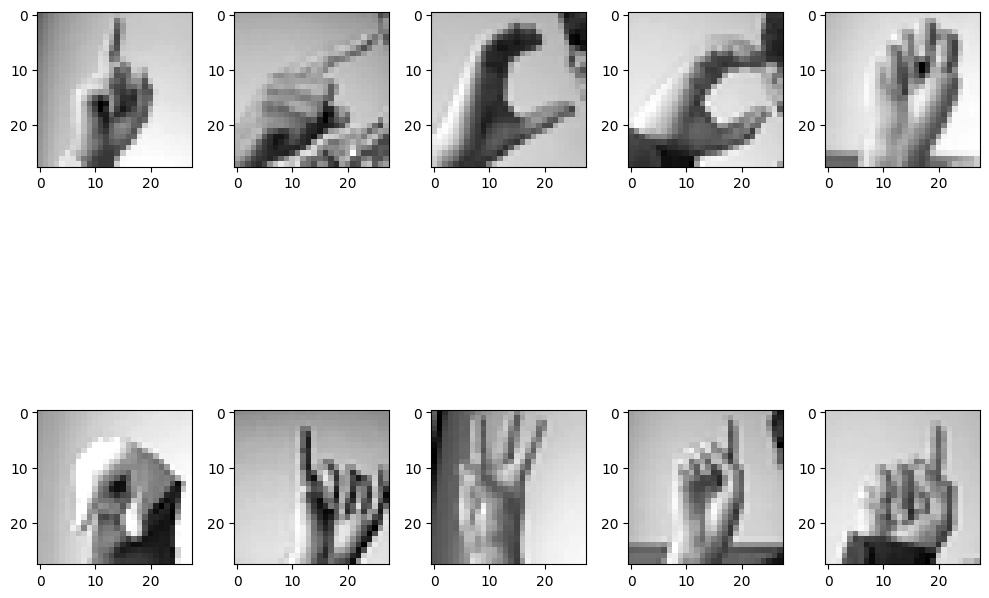

Epoch 1/5
429/429 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.1557 - loss: 2.7925 - val_accuracy: 0.6118 - val_loss: 1.0969
Epoch 2/5
429/429 ━━━━━━━━━━━━━━━━━━━━ 27s 62ms/step - accuracy: 0.6869 - loss: 0.9138 - val_accuracy: 0.8120 - val_loss: 0.5556
Epoch 3/5
429/429 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.8523 - loss: 0.4361 - val_accuracy: 0.8430 - val_loss: 0.4689
Epoch 4/5
429/429 ━━━━━━━━━━━━━━━━━━━━ 27s 62ms/step - accuracy: 0.9185 - loss: 0.2413 - val_accuracy: 0.8820 - val_loss: 0.3919
Epoch 5/5
429/429 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - accuracy: 0.9523 - loss: 0.1447 - val_accuracy: 0.8971 - val_loss: 0.3439
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8962 - loss: 0.3493
Test accuracy: 0.90


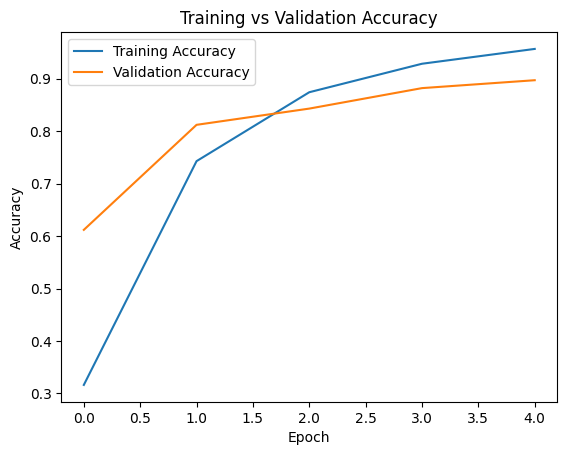

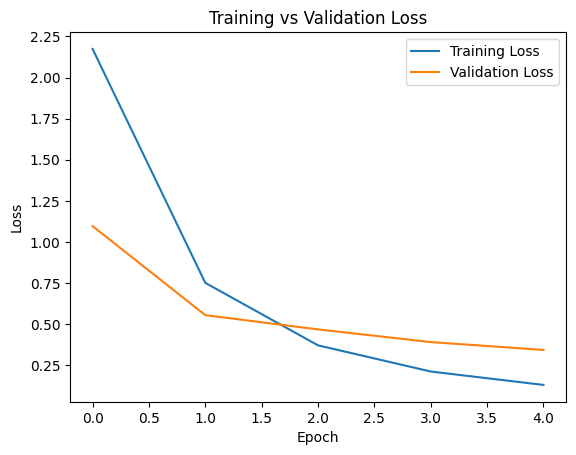

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Load the Sign Language MNIST dataset
train_data = pd.read_csv('/content/sign_mnist_train.csv')
test_data = pd.read_csv('/content/sign_mnist_test.csv')

# Separate labels and image data
train_labels = train_data['label']
train_images = train_data.drop('label', axis=1)

test_labels = test_data['label']
test_images = test_data.drop('label', axis=1)

# Reshape the images and normalize pixel values
train_images = np.array(train_images).reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = np.array(test_images).reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode the labels
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.transform(test_labels)

# Ensure that both train and test labels have 26 classes (for letters A-Z)
num_classes = 26
if train_labels.shape[1] < num_classes:
    missing_classes = num_classes - train_labels.shape[1]
    train_labels = np.pad(train_labels, ((0, 0), (0, missing_classes)), 'constant')

if test_labels.shape[1] < num_classes:
    missing_classes = num_classes - test_labels.shape[1]
    test_labels = np.pad(test_labels, ((0, 0), (0, missing_classes)), 'constant')

# Build the CNN model
model = Sequential()

# 1st Conv layer with Max Pooling
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Conv layer with Max Pooling
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Conv layer with Max Pooling
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer to convert 3D feature maps to 1D vector
model.add(Flatten())

# Fully connected Dense layer
model.add(Dense(128, activation='relu'))

# Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Output layer for classification (26 classes for A-Z)
model.add(Dense(26, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Visualize the first 10 images from the training dataset
f, ax = plt.subplots(2, 5)
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(train_images[k].reshape(28, 28), cmap="gray")
        k += 1
plt.tight_layout()
plt.show()

# Train the CNN model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.2f}')

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()
